In [96]:
import pandas as pd
import numpy as np

train = pd.read_csv("D:\\Machine Learning\\Machine Learning A-Z Template Folder\\Part 2 - Regression\\Section 5 - Multiple Linear Regression\\P14-Multiple-Linear-Regression\\Multiple_Linear_Regression\\50_Startups.csv")
print(train.head())

X = train.iloc[:,:-1]
y = train.iloc[:,4]



   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

label = LabelEncoder()
X.iloc[:,3] = label.fit_transform(X.iloc[:,3])
onehot = OneHotEncoder(categorical_features = [3])
X = onehot.fit_transform(X).toarray()


x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LinearRegression()

lr.fit(x_train,y_train)

lr.score(x_test,y_test)

y_pred = lr.predict(X)





c:\users\asus\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


       Actual      Predicted
0   192261.83  191913.727404
1   191792.06  187861.478390
2   191050.39  183805.404267
3   182901.99  173623.190356
4   166187.94  174098.252026
5   156991.12  164246.366805
6   156122.51  156165.844899
7   155752.60  159597.700472
8   152211.77  150220.996590
9   149759.96  155019.878223
10  146121.95  136305.240777
11  144259.40  136274.549626
12  141585.52  129287.259323
13  134307.35  126362.879083
14  132602.65  148486.454027
15  129917.04  145679.583113
16  126992.93  116405.477125
17  125370.37  128750.482885
18  124266.90  129833.757804
19  122776.86  113097.425244
20  118474.03  116544.511293
21  111313.02  115558.982017
22  110352.25  115188.840189
23  108733.99  111197.685067
24  108552.04  113471.568127
25  107404.34  100643.242816
26  105733.54  109741.350327
27  105008.31  113876.005204
28  103282.38   99143.488428
29  101004.64   99560.686847
30   99937.59   99677.494252
31   97483.56   95418.085702
32   97427.84   97599.275746
33   96778.92 

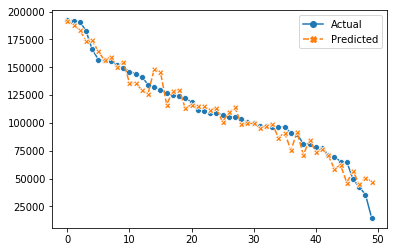

In [98]:
import matplotlib.pyplot as plt
import seaborn as sb

comp_dic = {"Predicted":y_pred,"Actual":y}
comp = pd.DataFrame(data = comp_dic)

sb.lineplot(data = comp, markers = True)

print(comp)

In [99]:
import statsmodels.api as sm

#X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
#print(X)
#X_opt = X[:,[0,1,2,3,4,5]]
#results = sm.OLS(endog = y,exog = X_opt).fit()
#results.summary() 



X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           2.90e-28
Time:                        12:10:42   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
x1          1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
x2          1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
x3          1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
x4             0.8609      0.031     27.665      0.000       0.798       0.924
x5            -0.0527      0.050     -1.045      0.301      -0.154       0.049
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     3.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.69e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""